Partiendo de 2000 datos de entrenamiento, 1000 de validación y 2000 de prueba extender la BD por medio de transformaciones

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Transformaciones que se aplicarán a las imágenes: Desplazamiento aleatorio horizontal, rotación aleatoria de máximo 0.1 radianes y una reducción de máximo 0.2

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

original_dir=r"/content/drive/MyDrive/PetImages"
new_base_dir=r"/content/drive/MyDrive/PetImages/cats_vs_dogs_small"

data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

Ajustando los datos para que todas las imágenes tengan la misma resolución y se procesen en lotes de 32 por cada pasada del algoritmo descenso de gradiente

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir+"/"+"train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir+"/"+"validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir+"/"+"test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


Otros ajustes a los datos y verificación del tensor que contiene los datos

In [ ]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [ ]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


Visualización de una imagen con todas las combinaciones de las tres transformaciones definidas, a saber: desplazamiento horizontal, rotacion de 0.1 radianes y Zoom de 0.2

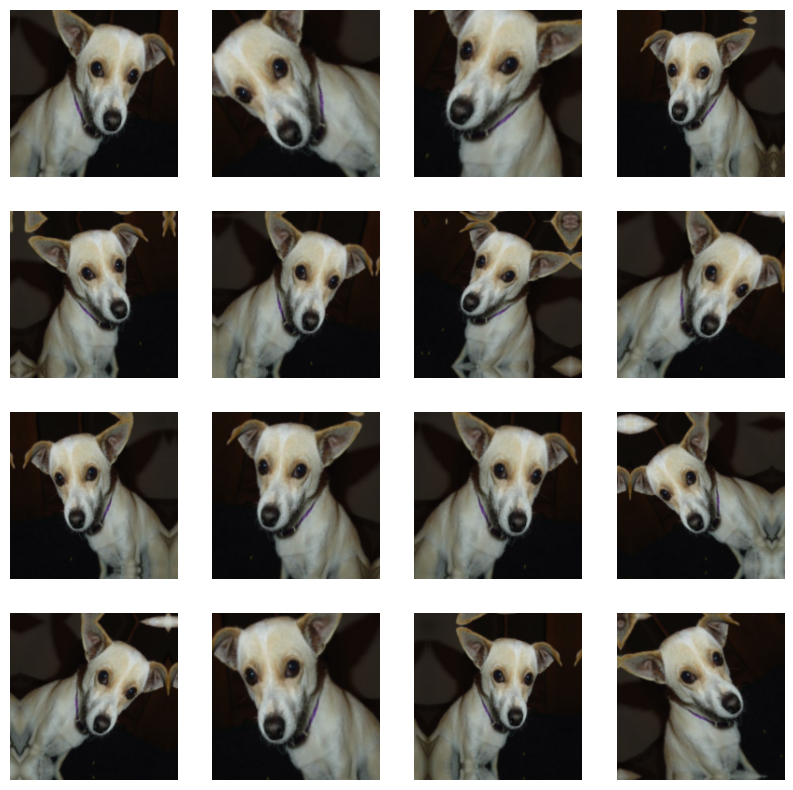

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(16):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

Arquitectura de la red neuronal y definición del algoritmo de descenso de gradiente, función de pérdida y métrica de evaluación

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

Fase de entrenamiento

In [ ]:
history = model.fit(
    train_dataset,
    epochs=10, #50
    validation_data=validation_dataset)

Epoch 1/10
63/63 [==============================] - 488s 8s/step - loss: 0.7006 - accuracy: 0.5075 - val_loss: 0.6937 - val_accuracy: 0.5000
Epoch 2/10
63/63 [==============================] - 8s 124ms/step - loss: 0.6945 - accuracy: 0.5200 - val_loss: 0.6941 - val_accuracy: 0.5000
Epoch 3/10
63/63 [==============================] - 10s 155ms/step - loss: 0.6901 - accuracy: 0.5275 - val_loss: 0.7108 - val_accuracy: 0.5020
Epoch 4/10
63/63 [==============================] - 7s 102ms/step - loss: 0.6857 - accuracy: 0.5655 - val_loss: 0.6838 - val_accuracy: 0.5530
Epoch 5/10
63/63 [==============================] - 9s 130ms/step - loss: 0.6644 - accuracy: 0.6030 - val_loss: 0.6585 - val_accuracy: 0.5970
Epoch 6/10
63/63 [==============================] - 7s 103ms/step - loss: 0.6467 - accuracy: 0.6330 - val_loss: 0.6615 - val_accuracy: 0.5970
Epoch 7/10
63/63 [==============================] - 9s 122ms/step - loss: 0.6357 - accuracy: 0.6265 - val_loss: 0.6889 - val_accuracy: 0.5830
Epoch 

Ejercicio:
---------
1. Verifique si hay overfitting graficando pérdida de entrenamiento con pérdida de validación
2. Si hay overfitting, probar con dropout en otras capas ¿Qué observa?
3. Si es necesario agregue batch-size para disminuir los tiempos de ejecución